<a href="https://colab.research.google.com/github/raz0208/Occlusion-Pedestrian-Detection/blob/main/cityscapes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1:
- Install Libraries
- Read Dataset from kaggle

In [12]:
# Install required libraries

import numpy as np
import pandas as pd
from google.colab import files
import random
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.utils import Sequence


%matplotlib inline

In [2]:
# Install Kaggle

!pip install kaggle

In [3]:
# Upload JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaazariaghouieh","key":"64b7017da0efc0f9837d9dc7b0591927"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the data from kaggle
#!/bin/bash
!kaggle datasets download shuvoalok/cityscapes

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/cityscapes
License(s): other
 93% 185M/199M [00:02<00:00, 81.5MB/s]
100% 199M/199M [00:02<00:00, 94.7MB/s]


In [6]:
# Extract the Zipfile
!unzip /content/cityscapes.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/img/train2754.png  
  inflating: train/img/train2755.png  
  inflating: train/img/train2756.png  
  inflating: train/img/train2757.png  
  inflating: train/img/train2758.png  
  inflating: train/img/train2759.png  
  inflating: train/img/train276.png  
  inflating: train/img/train2760.png  
  inflating: train/img/train2761.png  
  inflating: train/img/train2762.png  
  inflating: train/img/train2763.png  
  inflating: train/img/train2764.png  
  inflating: train/img/train2765.png  
  inflating: train/img/train2766.png  
  inflating: train/img/train2767.png  
  inflating: train/img/train2768.png  
  inflating: train/img/train2769.png  
  inflating: train/img/train277.png  
  inflating: train/img/train2770.png  
  inflating: train/img/train2771.png  
  inflating: train/img/train2772.png  
  inflating: train/img/train2773.png  
  inflating: train/img/train2774.png  
  inflating: train/img/train2775.png  
  inflating: tr

## Step 2: Primary Visualization

**Image Visualization**

Showing image: train545.png
Image Info: (96, 256, 3)



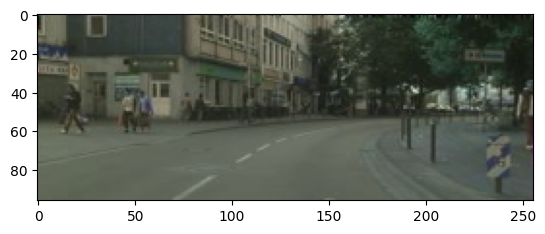

In [7]:
# Set the path to your image folder
img_folder = '/content/train/img'

# List all image files in the directory
img_files = [f for f in os.listdir(img_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if img_files is empty
if not img_files:
    print("No image files found in the specified folder.")
else:
    # Randomly choose an image file from the list
    random_img_file = random.choice(img_files)

    # Read and display the randomly chosen image
    img_path = os.path.join(img_folder, random_img_file)
    img = cv2.imread(img_path)
    print(f"Showing image: {random_img_file}")
    print(f"Image Info: {img.shape}\n")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

**Lable Visualization**

Showing image: train2562.png
Lable info: (96, 256, 3)



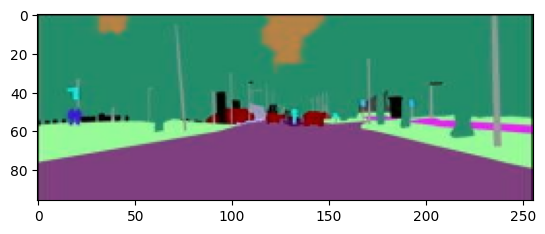

In [8]:
# Set the path to your image folder
label_folder = '/content/train/label'

# List all image files in the directory
label_files = [f for f in os.listdir(label_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if label_files is empty
if not label_files:
    print("No image files found in the specified folder.")
else:
    # Randomly choose an image file from the list
    random_label_file = random.choice(label_files)

    # Read and display the randomly chosen image
    label_path = os.path.join(label_folder, random_label_file)
    img = cv2.imread(label_path)
    print(f"Showing image: {random_label_file}")
    print(f"Lable info: {img.shape}\n")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

**Visualize both Original and lable together of Training set**

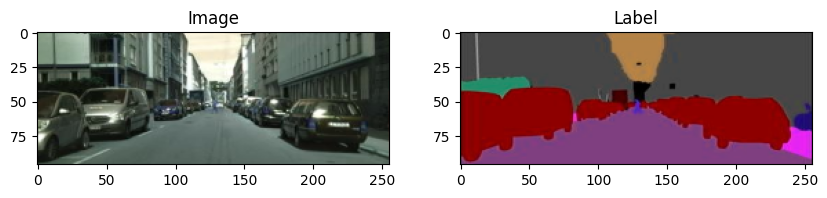

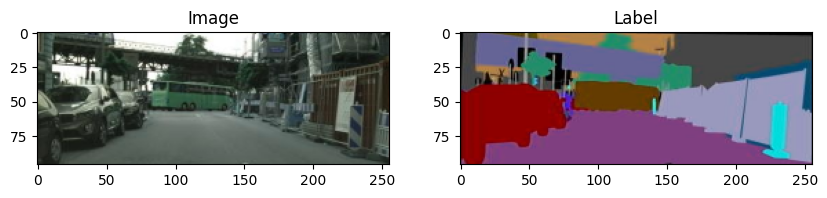

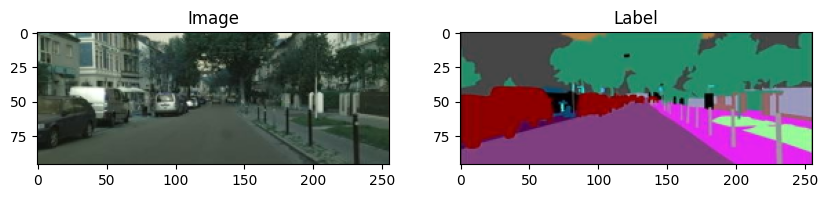

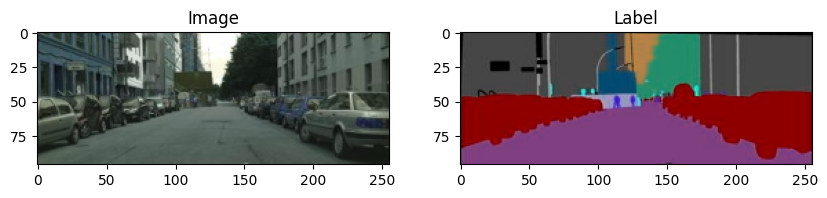

In [9]:
# Directories for images and labels
img_dir = "/content/train/img"
label_dir = "/content/train/label"

# Fetch all image paths
img_paths = [entry.path for entry in os.scandir(img_dir) if entry.is_file()]
label_paths = [entry.path for entry in os.scandir(label_dir) if entry.is_file()]

# Ensure both directories have the same number of files
num_images = min(len(img_paths), len(label_paths))

# Randomly select 4 image-label pairs
selected_indices = random.sample(range(num_images), 4)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_label_paths = [label_paths[i] for i in selected_indices]

# Display the images and labels
for img_path, label_path in zip(selected_img_paths, selected_label_paths):
    img = cv2.imread(img_path)
    label = cv2.imread(label_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    axes[1].imshow(cv2.cvtColor(label, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image")
    axes[1].set_title("Label")
    plt.show()

**Visualize both Original and lable together of Validation set**

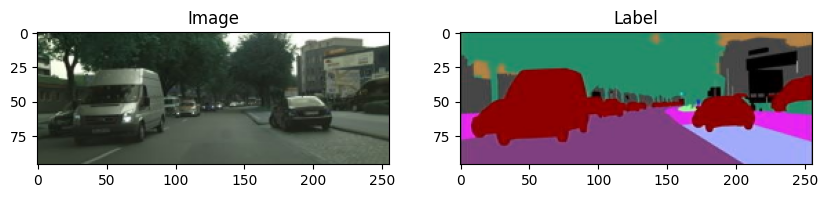

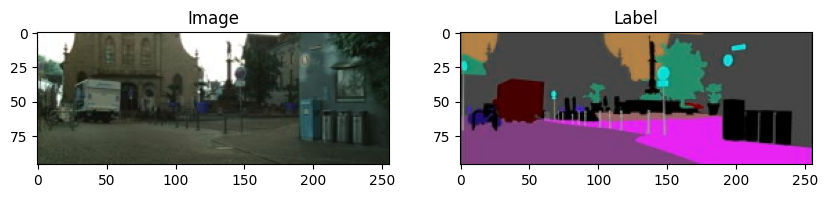

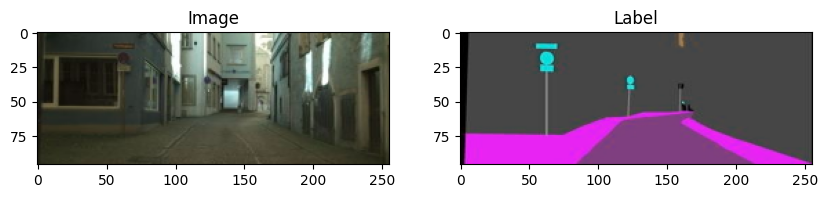

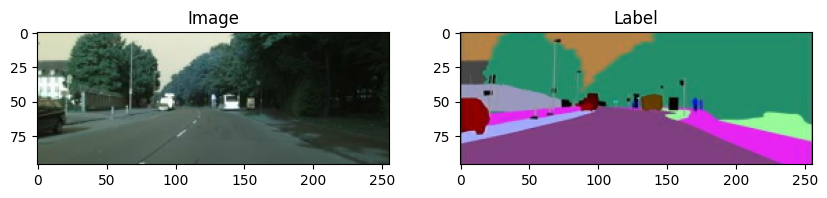

In [10]:
# Directories for images and labels
v_img_dir = "/content/val/img"
v_label_dir = "/content/val/label"

# Fetch all image paths
v_img_paths = [entry.path for entry in os.scandir(v_img_dir) if entry.is_file()]
v_label_paths = [entry.path for entry in os.scandir(v_label_dir) if entry.is_file()]

# Ensure both directories have the same number of files
num_vimages = min(len(v_img_paths), len(v_label_paths))

# Randomly select 4 image-label pairs
selected_indices = random.sample(range(num_vimages), 4)
selected_vimg_paths = [v_img_paths[i] for i in selected_indices]
selected_vlabel_paths = [v_label_paths[i] for i in selected_indices]

# Display the images and labels
for img_path, label_path in zip(selected_vimg_paths, selected_vlabel_paths):
    vimg = cv2.imread(img_path)
    vlabel = cv2.imread(label_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(vimg, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    axes[1].imshow(cv2.cvtColor(vlabel, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image")
    axes[1].set_title("Label")
    plt.show()

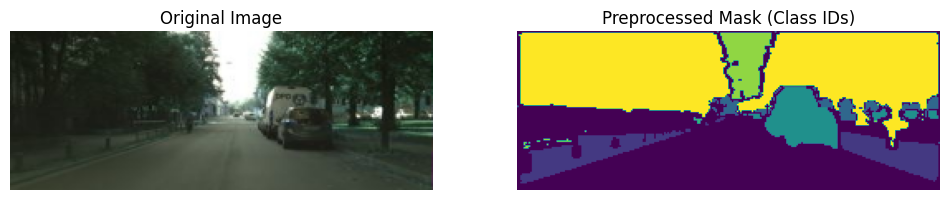

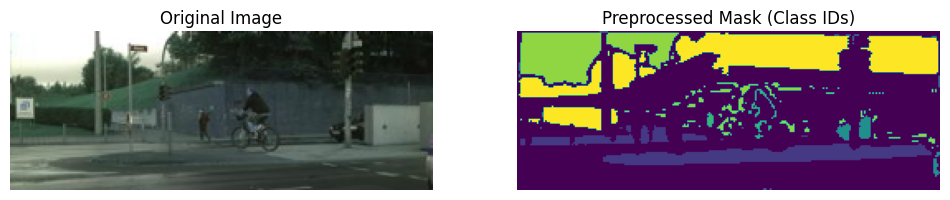

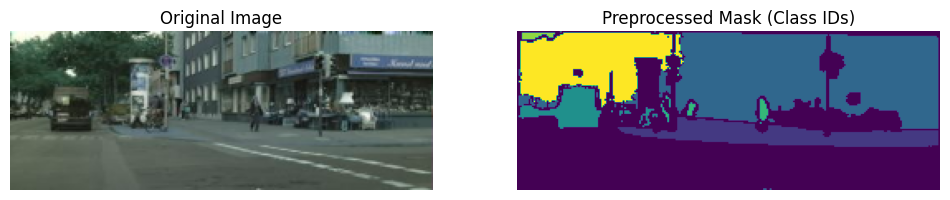

In [11]:
# Define the RGB values and tolerance for each class
color_to_class = {
    (127, 63, 128): 0,  # Road
    (234, 34, 245): 1,  # Sidewalk
    (70, 70, 70): 2,    # Building
    (142, 0, 0): 3,     # Vehicle (merged Car + Big Vehicle)
    (50, 19, 217): 4,   # Person (merged Pedestrian + Rider)
    (179, 130, 70): 5,  # Sky
    (34, 141, 106): 6   # Vegetation (merged Trees + Blvd)
}

# Tolerance for color matching
TOLERANCE = 30

# Number of classes
NUM_CLASSES = len(color_to_class)

# Function to load images without resizing
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for consistency
    return img

# Function to convert color-coded mask to class IDs with tolerance
def convert_mask_to_class_ids(mask_path):
    mask = cv2.imread(mask_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Convert to RGB for color matching

    # Initialize mask with background (default class 0)
    mask_class = np.zeros((mask.shape[0], mask.shape[1]), dtype=np.int32)

    # Assign each pixel in mask_class to the corresponding class ID based on color within tolerance
    for color, class_id in color_to_class.items():
        lower_bound = np.array([max(c - TOLERANCE, 0) for c in color], dtype=np.uint8)
        upper_bound = np.array([min(c + TOLERANCE, 255) for c in color], dtype=np.uint8)

        # Create a binary mask where pixels within the range are set to 255
        color_mask = cv2.inRange(mask, lower_bound, upper_bound)

        # Apply the class ID to pixels that match the color within tolerance
        mask_class[color_mask > 0] = class_id

    # One-hot encode the mask for the segmentation model
    mask_class = to_categorical(mask_class, num_classes=NUM_CLASSES)
    return mask_class

# Function to display random images and their masks
def display_random_images(selected_img_paths, selected_label_paths):
    random_pairs = list(zip(selected_img_paths, selected_label_paths))
    random.shuffle(random_pairs)
    selected_pairs = random_pairs[:3]

    for img_path, label_path in selected_pairs:
        original_img = load_image(img_path)
        processed_mask = convert_mask_to_class_ids(label_path)  # Preprocessed mask with class IDs

        # Plot original image and the preprocessed mask
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(original_img)
        axes[0].set_title("Original Image")
        axes[1].imshow(np.argmax(processed_mask, axis=-1), cmap="viridis")  # Display classes in preprocessed mask
        axes[1].set_title("Preprocessed Mask (Class IDs)")

        # Hide axes for clean display
        for ax in axes:
            ax.axis("off")
        plt.show()

# Directories for images and labels (modify paths if necessary)
img_folder = '/content/train/img'
label_folder = '/content/train/label'

# Fetch all image paths
img_paths = [entry.path for entry in os.scandir(img_folder) if entry.is_file()]
label_paths = [entry.path for entry in os.scandir(label_folder) if entry.is_file()]

# Ensure both directories have the same number of files
num_images = min(len(img_paths), len(label_paths))

# Randomly select 3 image-label pairs
selected_indices = random.sample(range(num_images), 3)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_label_paths = [label_paths[i] for i in selected_indices]

# Call the function to display random images
display_random_images(selected_img_paths, selected_label_paths)


In [13]:
class CityscapesDataGenerator(Sequence):
    def __init__(self, img_paths, label_paths, batch_size, img_size, num_classes):
        self.img_paths = img_paths
        self.label_paths = label_paths
        self.batch_size = batch_size
        self.img_size = img_size
        self.num_classes = num_classes
        self.indices = np.arange(len(self.img_paths))

    def __len__(self):
        return len(self.img_paths) // self.batch_size

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_img_paths = [self.img_paths[i] for i in indices]
        batch_label_paths = [self.label_paths[i] for i in indices]

        images = np.array([cv2.resize(load_image(img), self.img_size) for img in batch_img_paths])
        masks = np.array([cv2.resize(convert_mask_to_class_ids(label), self.img_size) for label in batch_label_paths])

        return images, masks

In [14]:
from tensorflow.keras import layers, Model

def unet_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Add more encoder layers as necessary

    # Decoder
    u8 = layers.UpSampling2D((2, 2))(p1)
    c8 = layers.Conv2D(num_classes, (1, 1), activation='softmax')(u8)

    model = Model(inputs, c8)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model instantiation
input_shape = (256, 256, 3)  # Adjust based on your input data
model = unet_model(input_shape, NUM_CLASSES)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 7)         │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,175 (153.03 KB)

 Trainable params: 39,175 (153.03 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Parameters
batch_size = 8
img_size = (256, 256)  # Adjust to desired resolution

# Instantiate data generators
train_generator = CityscapesDataGenerator(img_paths, label_paths, batch_size, img_size, NUM_CLASSES)
val_generator = CityscapesDataGenerator(v_img_paths, v_label_paths, batch_size, img_size, NUM_CLASSES)

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
 33/371 ━━━━━━━━━━━━━━━━━━━━ 21:57 4s/step - accuracy: 0.5200 - loss: 1.3341

KeyboardInterrupt: 

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
def visualize_predictions(img_paths, label_paths, model, num_samples=3):
    selected_indices = random.sample(range(len(img_paths)), num_samples)
    selected_img_paths = [img_paths[i] for i in selected_indices]
    selected_label_paths = [label_paths[i] for i in selected_indices]

    for img_path, label_path in zip(selected_img_paths, selected_label_paths):
        # Load and preprocess the image and label
        original_img = load_image(img_path)
        true_mask = convert_mask_to_class_ids(label_path)

        # Check the shape of true_mask to see if it needs np.argmax
        if true_mask.ndim == 3 and true_mask.shape[-1] > 1:
            true_mask = np.argmax(true_mask, axis=-1)

        # Resize the image and make a prediction
        img_resized = cv2.resize(original_img, (256, 256))  # Adjust to match input size
        img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
        pred_mask = model.predict(img_resized)[0]  # Predict and remove batch dimension
        pred_mask = np.argmax(pred_mask, axis=-1)  # Convert from one-hot to class IDs

        # Resize true mask for comparison (using nearest interpolation)
        true_mask_resized = cv2.resize(true_mask, (256, 256), interpolation=cv2.INTER_NEAREST)

        # Display the results
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(original_img)
        axes[0].set_title("Original Image")

        axes[1].imshow(true_mask_resized, cmap="viridis")
        axes[1].set_title("True Mask")

        axes[2].imshow(pred_mask, cmap="viridis")
        axes[2].set_title("Predicted Mask")

        # Hide axes for a clean display
        for ax in axes:
            ax.axis("off")
        plt.show()


In [ ]:
# Step 1: Upload an image
uploaded = files.upload()  # This will prompt you to upload an image file

# Step 2: Load and preprocess the image for the model
for filename in uploaded.keys():
    # Read the uploaded image
    test_img = cv2.imread(filename)
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Resize the image to match the model input size (256x256, or adjust as needed)
    input_img = cv2.resize(test_img_rgb, (256, 256))
    input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension

    # Step 3: Make a prediction
    pred_mask = model.predict(input_img)[0]  # Predict and remove batch dimension
    pred_mask = np.argmax(pred_mask, axis=-1)  # Convert from one-hot to class IDs

    # Resize the predicted mask back to original image size for comparison
    pred_mask_resized = cv2.resize(pred_mask, (test_img.shape[1], test_img.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Step 4: Display the uploaded image and the predicted mask
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(test_img_rgb)
    axes[0].set_title("Uploaded Image")

    axes[1].imshow(pred_mask_resized, cmap="viridis")
    axes[1].set_title("Predicted Mask")

    # Hide axes for a clean display
    for ax in axes:
        ax.axis("off")
    plt.show()
